In [1]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ayan0\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
import pandas as pd

# Load the Excel file
file_path = 'Output.xlsx'  # Replace with your file path
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Ensure all entries in the 'Content' column are strings and handle NaN values
df['Content'] = df['Content'].astype(str).fillna('')

# Display the first few rows of the dataframe
print(df.head())


                                               Title  \
0  Rising IT cities and its impact on the economy...   
1  Rising IT Cities and Their Impact on the Econo...   
2  Internet Demand’s Evolution, Communication Imp...   
3  Rise of Cybercrime and its Effect in upcoming ...   
4  OTT platform and its impact on the entertainme...   

                                             Content  
0  We have seen a huge development and dependence...  
1  Throughout history, from the industrial revolu...  
2  Introduction In the span of just a few decades...  
3  The way we live, work, and communicate has unq...  
4  The year 2040 is poised to witness a continued...  


In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each content
df['Sentiment_Score'] = df['Content'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Classify sentiment based on the compound score
df['Sentiment'] = df['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Display the resulting dataframe with sentiment scores
print(df.head())


                                               Title  \
0  Rising IT cities and its impact on the economy...   
1  Rising IT Cities and Their Impact on the Econo...   
2  Internet Demand’s Evolution, Communication Imp...   
3  Rise of Cybercrime and its Effect in upcoming ...   
4  OTT platform and its impact on the entertainme...   

                                             Content  Sentiment_Score  \
0  We have seen a huge development and dependence...           0.9922   
1  Throughout history, from the industrial revolu...           0.9994   
2  Introduction In the span of just a few decades...           0.9971   
3  The way we live, work, and communicate has unq...          -0.9950   
4  The year 2040 is poised to witness a continued...           0.9953   

  Sentiment  
0  Positive  
1  Positive  
2  Positive  
3  Negative  
4  Positive  


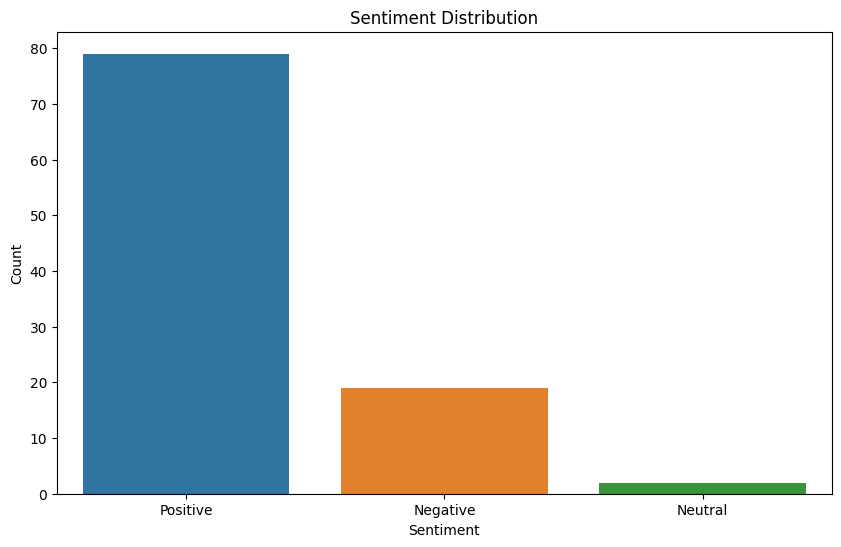

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sentiment')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ayan0\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                               Title  \
0  Rising IT cities and its impact on the economy...   
1  Rising IT Cities and Their Impact on the Econo...   
2  Internet Demand’s Evolution, Communication Imp...   
3  Rise of Cybercrime and its Effect in upcoming ...   
4  OTT platform and its impact on the entertainme...   

                                             Content  Sentiment_Score  \
0  We have seen a huge development and dependence...           0.9922   
1  Throughout history, from the industrial revolu...           0.9994   
2  Introduction In the span of just a few decades...           0.9971   
3  The way we live, work, and communicate has unq...          -0.9950   
4  The year 2040 is poised to witness a continued...           0.9953   

       Sentiment  
0  Very Positive  
1  Very Positive  
2  Very Positive  
3  Very Negative  
4  Very Positive  


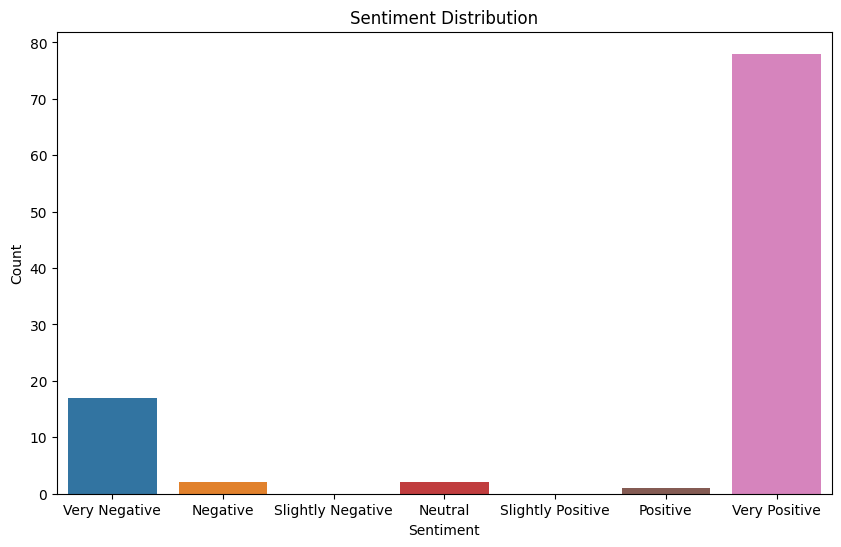

In [8]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = 'Output.xlsx'  # Replace with your file path
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Ensure all entries in the 'Content' column are strings and handle NaN values
df['Content'] = df['Content'].astype(str).fillna('')

# Initialize the sentiment analyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each content
df['Sentiment_Score'] = df['Content'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Define function to classify sentiment into seven categories
def classify_sentiment(score):
    if score <= -0.6:
        return 'Very Negative'
    elif -0.6 < score <= -0.2:
        return 'Negative'
    elif -0.2 < score < 0:
        return 'Slightly Negative'
    elif score == 0:
        return 'Neutral'
    elif 0 < score <= 0.2:
        return 'Slightly Positive'
    elif 0.2 < score <= 0.6:
        return 'Positive'
    else:
        return 'Very Positive'

# Classify sentiment based on the compound score
df['Sentiment'] = df['Sentiment_Score'].apply(classify_sentiment)

# Display the resulting dataframe with sentiment scores
print(df.head())

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sentiment', order=['Very Negative', 'Negative', 'Slightly Negative', 'Neutral', 'Slightly Positive', 'Positive', 'Very Positive'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


                                               Title  \
0  Rising IT cities and its impact on the economy...   
1  Rising IT Cities and Their Impact on the Econo...   
2  Internet Demand’s Evolution, Communication Imp...   
3  Rise of Cybercrime and its Effect in upcoming ...   
4  OTT platform and its impact on the entertainme...   

                                             Content  Sentiment_Polarity  \
0  We have seen a huge development and dependence...            0.243518   
1  Throughout history, from the industrial revolu...            0.121837   
2  Introduction In the span of just a few decades...            0.100987   
3  The way we live, work, and communicate has unq...            0.041761   
4  The year 2040 is poised to witness a continued...            0.117054   

           Sentiment  
0           Positive  
1  Slightly Positive  
2  Slightly Positive  
3  Slightly Positive  
4  Slightly Positive  


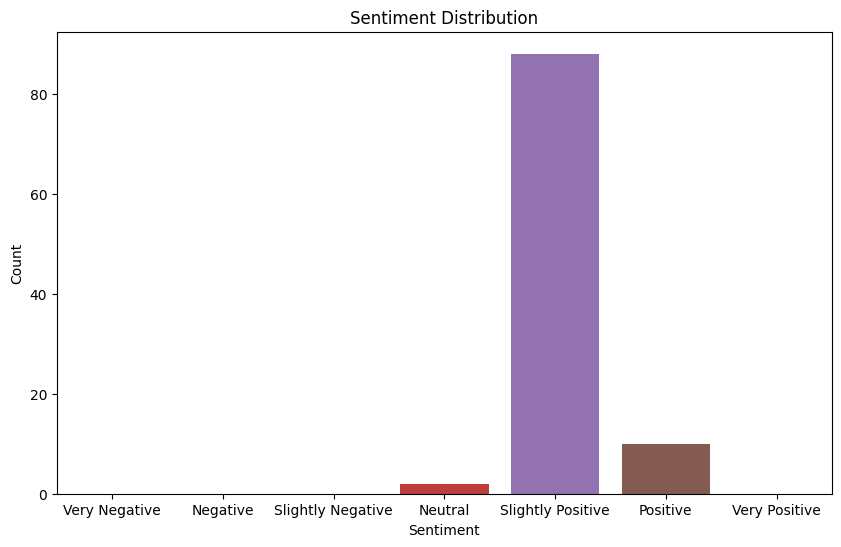

In [10]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = 'Output.xlsx'  # Replace with your file path
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Ensure all entries in the 'Content' column are strings and handle NaN values
df['Content'] = df['Content'].astype(str).fillna('')

# Apply sentiment analysis to each content
df['Sentiment_Polarity'] = df['Content'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Define function to classify sentiment into seven categories
def classify_sentiment(polarity):
    if polarity <= -0.6:
        return 'Very Negative'
    elif -0.6 < polarity <= -0.2:
        return 'Negative'
    elif -0.2 < polarity < 0:
        return 'Slightly Negative'
    elif polarity == 0:
        return 'Neutral'
    elif 0 < polarity <= 0.2:
        return 'Slightly Positive'
    elif 0.2 < polarity <= 0.6:
        return 'Positive'
    else:
        return 'Very Positive'

# Classify sentiment based on the polarity score
df['Sentiment'] = df['Sentiment_Polarity'].apply(classify_sentiment)

# Display the resulting dataframe with sentiment scores
print(df.head())

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sentiment', order=['Very Negative', 'Negative', 'Slightly Negative', 'Neutral', 'Slightly Positive', 'Positive', 'Very Positive'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
